## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [102]:
# import models and fit

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Load the DataFrame from the pickle file
# data = pd.read_pickle('data.pkl')
# print("DataFrame loaded successfully")
# df = data
# df.head()

In [105]:
# Load the pickled data
X_train = pd.read_pickle('pickles/X_train.pkl')
X_test = pd.read_pickle('pickles/X_test.pkl')
y_train = pd.read_pickle('pickles/y_train.pkl')
y_test = pd.read_pickle('pickles/y_test.pkl')

In [106]:
# # Check for null values
# print("Null values in X_train:")
# print(X_train.isnull().sum())

# print("Null values in X_test:")
# print(X_test.isnull().sum())

# print("Null values in y_train:")
# print(y_train.isnull().sum())

# print("Null values in y_test:")
# print(y_test.isnull().sum())

In [107]:
# Drop rows with null values in 'city_target_encoded' in X_test
X_test = X_test.dropna(subset=['city_target_encoded'])

# Verify that null values in 'city_target_encoded' are removed
print("Null values in X_test after dropping rows:")
print(X_test['city_target_encoded'].isnull().sum())

Null values in X_test after dropping rows:
0


1. Linear Regression

In [108]:
# Importing necessary modules
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Align y_test with X_test after dropping rows with nulls in 'city_target_encoded'
y_test = y_test[X_test.index]

# Initialize and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train.values)

# Predict on the scaled test data
y_pred_lr = linear_reg.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 145854509592.19656
R-squared: 0.5063865830193197


In [111]:
# put scaled/no NaN versions into processed folder for use with hyperparameter tuning
import pickle

with open('pickles/processed/X_train_scaled.txt', 'wb') as fh:
   pickle.dump(X_train_scaled, fh)

with open('pickles/processed/X_test_scaled.txt', 'wb') as fh:
   pickle.dump(X_test_scaled, fh)

with open('pickles/processed/y_train_cleaned.txt', 'wb') as fh:
   pickle.dump(y_train, fh)

with open('pickles/processed/y_test_cleaned.txt', 'wb') as fh:
   pickle.dump(y_test, fh)

In [112]:
y_test = y_test[X_test.index]

linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train.values)

y_train_pred = linear_reg.predict(X_train_scaled)
y_test_pred = linear_reg.predict(X_test_scaled)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train results:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")

print("Test results:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")

Train results:
Mean Squared Error: 57079968131.07902
R-squared: 0.6629891007799413
Test results:
Mean Squared Error: 145854509592.19656
R-squared: 0.5063865830193197


2. SVM

In [113]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svm_regressor = SVR(kernel='rbf', C=100, epsilon=0.1)  # Will tune later

# Fit the model on the training data
svm_regressor.fit(X_train_scaled, y_train.values)

# Predict on the test data
y_pred_svm = svm_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_svm)
r2 = r2_score(y_test, y_pred_svm)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 301342955363.1485
R-squared: -0.019830832078835847


3. Random Forest

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Will tune later

# Fit the model on the training data
rf_regressor.fit(X_train_scaled, y_train.values)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 118289368284.31741
R-squared: 0.5996749127979519


4. xgboost

In [115]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Fit the model on the training data
xgb_regressor.fit(X_train_scaled, y_train.values)

# Predict on the test data
y_pred_xgb = xgb_regressor.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 152373904869.29163
R-squared: 0.48432308297141446


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [116]:
# gather evaluation metrics and compare results

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define a function to calculate metrics
def calculate_metrics(y_test, y_pred, n, k):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print(f"Adjusted R-squared: {adj_r2}")

# Number of samples (n) and number of features (k)
n = len(y_test)
k = X_train.shape[1]

# Linear Regression
print("Linear Regression Metrics:")
calculate_metrics(y_test, y_pred_lr, n, k)

# Support Vector Machine
print("\nSupport Vector Machine Metrics:")
calculate_metrics(y_test, y_pred_svm, n, k)

# Random Forest
print("\nRandom Forest Metrics:")
calculate_metrics(y_test, y_pred_rf, n, k)

# XGBoost
print("\nXGBoost Metrics:")
calculate_metrics(y_test, y_pred_xgb, n, k)

Linear Regression Metrics:
Mean Squared Error (MSE): 145854509592.19656
Root Mean Squared Error (RMSE): 381909.0331377311
Mean Absolute Error (MAE): 169524.15612256597
R-squared (R²): 0.5063865830193197
Adjusted R-squared: 0.42967638983988965

Support Vector Machine Metrics:
Mean Squared Error (MSE): 301342955363.1485
Root Mean Squared Error (RMSE): 548947.1334865941
Mean Absolute Error (MAE): 240273.5446929714
R-squared (R²): -0.019830832078835847
Adjusted R-squared: -0.17831805598297934

Random Forest Metrics:
Mean Squared Error (MSE): 118289368284.31741
Root Mean Squared Error (RMSE): 343932.21466492116
Mean Absolute Error (MAE): 132034.9503377065
R-squared (R²): 0.5996749127979519
Adjusted R-squared: 0.5374622303273633

XGBoost Metrics:
Mean Squared Error (MSE): 152373904869.29163
Root Mean Squared Error (RMSE): 390351.0021369122
Mean Absolute Error (MAE): 141338.50884600493
R-squared (R²): 0.48432308297141446
Adjusted R-squared: 0.4041841026223775


## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [118]:
# perform feature selection 
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)

1. Lasso

In [119]:
from sklearn.linear_model import Lasso

# Fit Lasso
lasso = Lasso(alpha=0.5, max_iter=10000, tol=1)  # Adjust alpha as needed
lasso.fit(X_train_scaled, y_train.values)

# Get the selected features
selected_features = X_train.columns[(lasso.coef_ != 0)]
print("Lasso Selected Features:", selected_features)

Lasso Selected Features: Index(['descrip_year_built', 'descrip_lot_sqft', 'descrip_sqft',
       'garage_car_spaces', 'descrip_stories', 'descrip_beds', 'descrip_baths',
       'property_type_condo', 'property_type_land', 'property_type_mobile',
       'property_type_multi_family', 'property_type_other_unknown',
       'property_type_single_family', 'property_type_townhouse', 'has_parking',
       'heating', 'porch', 'laundry_facilities', 'notable_kitchen',
       'notable_ceiling', 'recently_updated', 'multimedia_room',
       'enclosed_yard', 'cul_de_sac', 'family_room', 'hardwood_floors',
       'basement', 'rental_property', 'furniture', 'private_courtyard',
       'central_air', 'dishwasher', 'fireplace', 'den_or_office',
       'smart_homes', 'guest_parking', 'storm_shelter', 'exposed_brick',
       'solar_power', 'security', 'pets_allowed', 'dining_room', 'wine_cellar',
       'days_since_sold', 'state_target_encoded', 'city_target_encoded'],
      dtype='object')


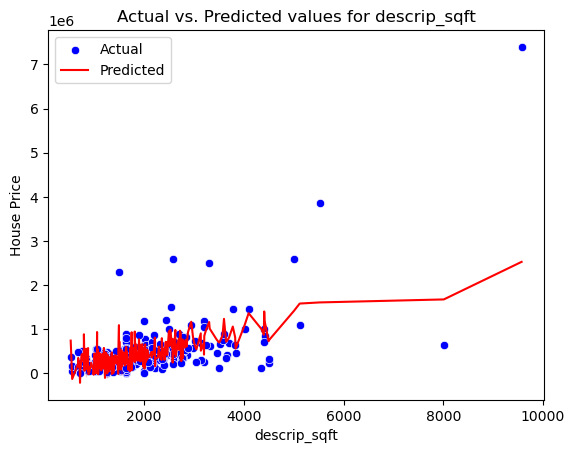

In [120]:
import seaborn as sns

feature = 'descrip_sqft'
y_pred_lasso = lasso.predict(X_test_scaled)

sns.scatterplot(x=X_test[feature], y=y_test, label="Actual", color="blue")

sns.lineplot(x=X_test[feature], y=y_pred_lasso, label="Predicted", color="red")


plt.xlabel(feature)
plt.ylabel("House Price")
plt.title(f"Actual vs. Predicted values for {feature}")
plt.legend()
plt.show()

In [121]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train.values)

ElasticNet(alpha=0.1)

In [122]:
y_pred = elastic_net.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 148231538368.08246
R-squared: 0.498342037124873


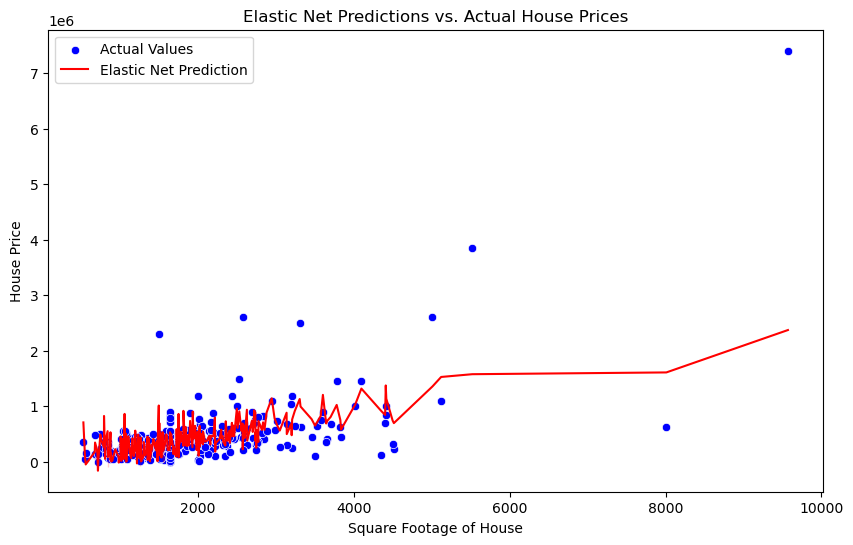

In [123]:
feature = 'descrip_sqft'

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test[feature], y=y_test, label='Actual Values', color='blue')

sns.lineplot(x=X_test[feature], y=elastic_net.predict(X_test_scaled), color='red', label='Elastic Net Prediction')

plt.xlabel('Square Footage of House')
plt.ylabel('House Price')
plt.title('Elastic Net Predictions vs. Actual House Prices')
plt.legend()
plt.show()

In [124]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],      
    'l1_ratio': [0.1, 0.5, 0.7, 1]          
}

elastic_net = ElasticNet(max_iter=20000)
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test_scaled)

c:\Users\mebar\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.096e+10, tolerance: 2.033e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\mebar\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.182e+10, tolerance: 2.101e+10
  model = cd_fast.enet_coordinate_descent(
c:\Users\mebar\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.616e+10, toleranc

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
Best Score (Negative MSE): -64790136469.62959


2. RFE

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Choose a model for RFE
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)  
rfe.fit(X_train_scaled, y_train.values)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("RFE Selected Features:", selected_features)

RFE Selected Features: Index(['descrip_year_built', 'descrip_lot_sqft', 'descrip_sqft',
       'descrip_beds', 'descrip_baths', 'property_type_condo',
       'property_type_single_family', 'pets_allowed', 'state_target_encoded',
       'city_target_encoded'],
      dtype='object')


3. Forward Selection

In [126]:
import statsmodels.api as sm
import pandas as pd

def forward_selection(X, y, significance_level=0.05):
    initial_features = X_train.columns.tolist()
    selected_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(selected_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[selected_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_feature = new_pval.idxmin()
            selected_features.append(best_feature)
        else:
            break
    return selected_features

# Run forward selection
selected_features_forward = forward_selection(X_train_scaled, y_train.values)
print("Forward Selection Selected Features:", selected_features_forward)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

4. Backward Selection

In [ ]:
def backward_selection(X, y, significance_level=0.05):
    features = X.columns.tolist()
    while len(features) > 0:
        model = sm.OLS(y, sm.add_constant(X[features])).fit()
        p_values = model.pvalues.iloc[1:]  
        max_p_value = p_values.max()
        if max_p_value >= significance_level:
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

# Run backward selection
selected_features_backward = backward_selection(X, y)
print("Backward Selection Selected Features:", selected_features_backward)

Backward Selection Selected Features: ['year', 'km_driven', 'kmpl', 'engine_cc', 'power_bhp', 'seats']
